# Importando as Bibliotecas

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
df = pd.read_csv("CC GENERAL.csv")
df.drop(columns=["CUST_ID", "TENURE"], inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [4]:
print("O dado possui",df.shape[0], "amostras e", df.shape[1], "atributos")

O dado possui 8950 amostras e 16 atributos


In [5]:
missing = df.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [6]:
df.fillna(df.median(), inplace=True)
missing = df.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


# Feature Engineering - 1

<AxesSubplot:>

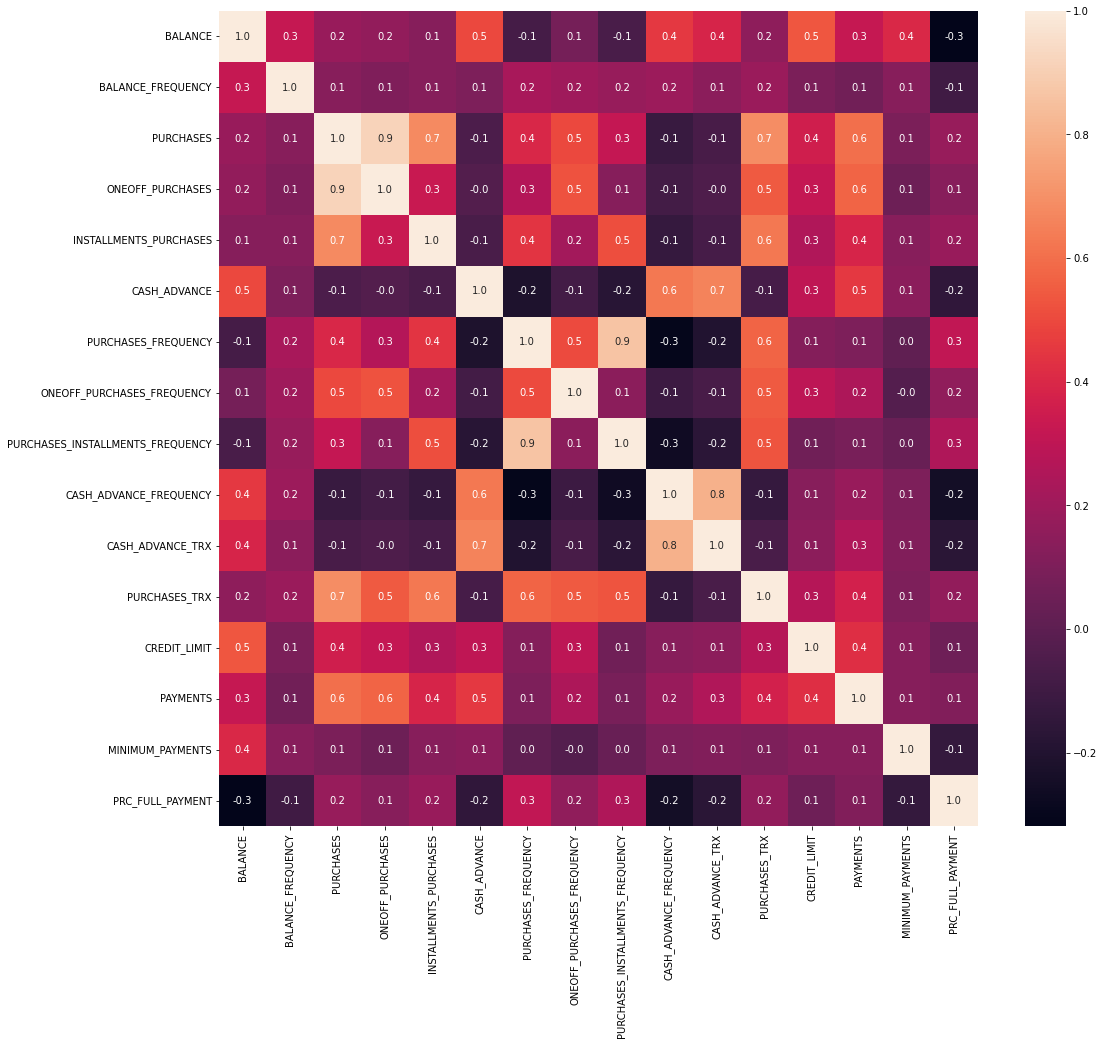

In [7]:
matriz_correlacao =df.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

In [8]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.85]
matriz_correlacao_v1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
BALANCE,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE_FREQUENCY,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PURCHASES,NaN,NaN,1.000000,0.916845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ONEOFF_PURCHASES,NaN,NaN,0.916845,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INSTALLMENTS_PURCHASES,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CASH_ADVANCE,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PURCHASES_FREQUENCY,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.862934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ONEOFF_PURCHASES_FREQUENCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PURCHASES_INSTALLMENTS_FREQUENCY,NaN,NaN,NaN,NaN,NaN,NaN,0.862934,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CASH_ADVANCE_FREQUENCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataset = df.drop(columns=["ONEOFF_PURCHASES", "PURCHASES_INSTALLMENTS_FREQUENCY"]) 

# Rodando os Modelos

In [10]:
def calcular_wcss(data):
    wcss = []
    for k in range(1,10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters']=kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [11]:
df_balance = df[['BALANCE']]
df_balance.head()
soma_quadrados = calcular_wcss(df_balance)


/var/folders/63/r6q02qh978b2cq3rygjg3n1m0000gn/T/ipykernel_19612/3053334412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters']=kmeans.labels_
/var/folders/63/r6q02qh978b2cq3rygjg3n1m0000gn/T/ipykernel_19612/3053334412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters']=kmeans.labels_
/var/folders/63/r6q02qh978b2cq3rygjg3n1m0000gn/T/ipykernel_19612/3053334412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

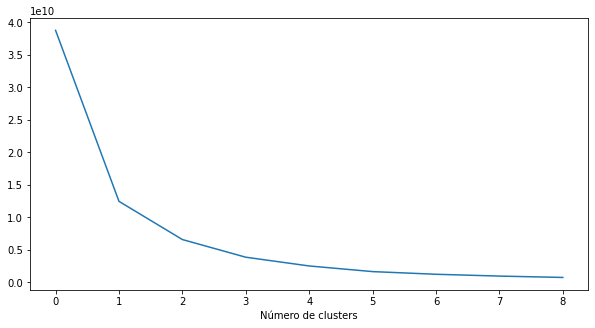

In [12]:
plt.figure(figsize=(10,5))
plt.plot(soma_quadrados)
plt.xlabel('Número de clusters')
plt.show()

In [13]:
x1, y1 = 2,soma_quadrados[0]
x2, y2 = 10,soma_quadrados[len(soma_quadrados)-1]
    
new = []
for i in range(len(soma_quadrados)):
    x0 = i+2
    y0 = soma_quadrados[i]
    numerador = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
    denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    new.append(numerador/denominador)

melhor_cluster = new.index(max(new)) + 2



In [23]:
values = Normalizer().fit_transform(df.values)
kmeans = KMeans(n_clusters=melhor_cluster, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

# Validação com o Silhouette, Davies Bouldin, Calinski

In [15]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=melhor_cluster, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [16]:
random_data = np.random.rand(8950, 16)

s1, dbs1, calinski1 = clustering_algorithm(5, values)
s, dbs, calinski = clustering_algorithm(melhor_cluster, random_data)
print(s1, dbs1, calinski1)
print(s, dbs, calinski)


0.34825743673945714 1.2212897290249243 3528.7176223195843
0.040008075044657365 3.8619621663882 332.40937002647536


In [17]:
set1, set2, set3 = np.array_split(values, 3) 
s1, dbs1, calinski1 = clustering_algorithm(melhor_cluster, set1)
s2, dbs2, calinski2 = clustering_algorithm(melhor_cluster, set2)
s3, dbs3, calinski3 = clustering_algorithm(melhor_cluster, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3539365567789984 1.1600500216962613 1205.0962308393632
0.3579918892235798 1.1481051277562329 1212.520678199777
0.35748343068042765 1.2647292659421105 1177.0044108806744


# EDA

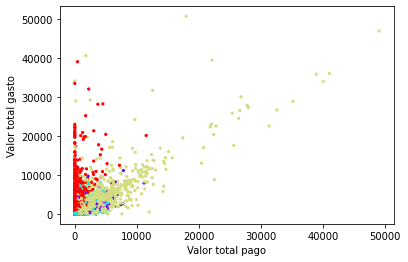

In [28]:
labels = kmeans.labels_
df["cluster"] = labels

plt.scatter(df['PURCHASES'], df['PAYMENTS'], c= labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

# Feature Engineering - 2

In [29]:
df.groupby("cluster").describe()

BALANCE                                                     \
          count         mean          std         min          25%   
cluster                                                              
0        2214.0  3135.603247  2575.447077  114.523682  1287.939171   
1        3366.0   494.425578   911.098284    0.000000    24.689935   
2        1657.0  1112.504042  1630.639904    0.000000   208.581872   
3        1713.0  2073.653488  1992.529303    0.000000   722.404832   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2109.140702  4394.912690  18495.558550            2214.0  0.996246   
1          88.864667   477.056467   7533.854422            3366.0  0.782325   
2         544.879717  1296.922119  19043.138560            1657.0  0.911103   
3        1396.385805  2784.030599  14581.459140            1713.0  0.877338   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1852.325655  76406.207520           2214.0  0.001476   
1        ...       266.655387   3933.230932           3366.0  0.241182   
2        ...       574.771719  18621.013310           1657.0  0.272632   
3        ...       936.940012  21235.065300           1713.0  0.063577   

                                                           
              std  min  25%       50%       75%       max  
cluster                                                    
0        0.012044  0.0  0.0  0.000000  0.000000  0.181818  
1        0.344302  0.0  0.0  0.000000  0.416667  1.000000  
2        0.361402  0.0  0.0  0.083333  0.500000  1.000000  
3        0.144426  0.0  0.0  0.000000  0.083333  1.000000  

[4 rows x 128 columns]

In [30]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.28987034e-01 2.88650584e-04 8.55725867e-02 4.24377039e-02
  4.32299306e-02 1.18679409e-01 9.23415704e-05 2.96846643e-05
  6.81379545e-05 4.18384713e-05 7.73094730e-04 1.98084797e-03
  6.63315961e-01 1.96171274e-01 2.83563247e-01 4.11163583e-07]
 [7.56762644e-02 2.29872695e-04 1.22931772e-01 4.99541404e-02
  7.30767015e-02 2.48419116e-02 1.70838317e-04 3.41839200e-05
  1.38191155e-04 8.27756382e-06 1.30236659e-04 2.85628436e-03
  9.41926347e-01 1.53223035e-01 5.72492681e-02 7.40359697e-05]
 [1.55943825e-01 2.41722117e-04 4.15911123e-01 2.39890351e-01
  1.76177597e-01 3.48987276e-02 1.97215850e-04 8.45428702e-05
  1.45452886e-04 1.11934483e-05 2.14789401e-04 5.89638957e-03
  5.81981930e-01 4.41084482e-01 9.95348919e-02 7.07000013e-05]
 [2.99782071e-01 2.24374000e-04 4.29997757e-02 2.37095105e-02
  1.92962590e-02 4.88897968e-01 4.57117049e-05 1.59833073e-05
  3.05868491e-05 7.68310609e-05 1.80110502e-03 8.37488044e-04
  6.15346508e-01 3.66115545e-01 1.16169613e-01 1.51920662e-05]]


In [31]:
max = len(centroids[0])
for i in range(max):
    print(df.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))
# df.columns.values[i] pega cada coluna do df
# "\n{:.4f}" até 4 casas depois da virgula para o resultado
# format(centroids[:, i].var()) pega todos os centroides (:) com base em todos para o atributo representado por i


BALANCE 
0.0297
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0215
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0359
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0202
PAYMENTS 
0.0140
MINIMUM_PAYMENTS 
0.0074
PRC_FULL_PAYMENT 
0.0000


In [32]:
#com base na celula anterior, selecionarei as variaveis diferentes de zero: BALANCE 0.0224, PURCHASES 0.0197, CASH_ADVANCE 0.0225, CREDIT_LIMIT 0.0360, PAYMENTS 0.0279, MINIMUM_PAYMENTS 0.0543
description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients 
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        3135.603247   520.790989    873.709081   4119.557362  1085.707366   
1         494.425578   641.730856    154.870275   5174.713505   821.004877   
2        1112.504042  3108.849662    260.502413   3976.053870  3349.882383   
3        2073.653488   300.188009   3428.814190   4142.861186  2798.379358   

         MINIMUM_PAYMENTS  n_clients  
cluster                               
0             2007.279167       2214  
1              237.191607       3366  
2              623.344050       1657  
3              751.039957       1713  


/var/folders/63/r6q02qh978b2cq3rygjg3n1m0000gn/T/ipykernel_19612/1440892446.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]


# Resultados

**CLUSTER 0**: Clientes que gastam bem. Clientes com bom limite. Pagadores Razoáveis. Boa quantidade de clientes.

**CLUSTER 1**: Clientes que gastam bem. Clientes com o maior limite. Piores pagadores. Boa quantidade de clientes.

**CLUSTER 2**: Clientes que gastam bastante. Clientes com o menor limite. Melhores pagadores. Poucos Clientes

**CLUSTER 3**: Clientes que gastam pouco. Clientes com bom limite. Pagadores Razoáveis. Poucos Clientes



In [33]:
df.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2214.0,0.001476,0.012044,0.0,0.0,0.000000,0.000000,0.181818
1,3366.0,0.241182,0.344302,0.0,0.0,0.000000,0.416667,1.000000
2,1657.0,0.272632,0.361402,0.0,0.0,0.083333,0.500000,1.000000
3,1713.0,0.063577,0.144426,0.0,0.0,0.000000,0.083333,1.000000


Uma ideia, utilizando esses dados, é montar uma estratégia de negócio em um dos grupos com o objetivo de aumentar o arrecadamento de dinheiro. O grupo mais adequado para isso seria o cluster 0, pois ele possui um bom número de clientes e são bons pagadores, bom limite de crédito. Fazer com que eles utilizem mais o cartão de crédito.

O cluster 2 gasta muito com compras e são os melhores pagadores. Eles não possuem um limite de crédito alto, mas podemos incentivá-los a usarem o cartão de crédito aumentando o limite desse grupo.

Os piores pagadores devem ter uma estratégia melhor definida para evitar inadimplência.


Em análises futuras, podemos aplicar os modelos DBScan e MeanShift.